In [3]:
import warnings
import pandas as pd
import pandas_ta
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
import matplotlib.pyplot as plt 
import seaborn

In [4]:
def predictLinearRegression(data,company):
    data.index=pd.to_datetime(data['Date'])
    data=data.drop(['Date'],axis='columns')
    data=data.loc['01-01-2007':]

    #data=data.loc['01-01-2008':'12-31-2011','01-01-2020':'12-31-2020','01-01-2021':'12-31-2021']
    #print(data)

    X=data[['Open','Close']]
    y=data[['Adjusted Close']]
    X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.3,random_state=None)

    model=LinearRegression()
    model.fit(X_Train,y_Train)
    y_pred=model.predict(X_Test)
    #print(X)
    print("Mean squared error of",company,mean_squared_error(y_Test,y_pred))
    y_pred = pd.DataFrame(y_pred,index=y_Test.index,columns = ['Predicted Adjusted Close'])
 

    ylabel=company+" Stock Price"
    y_pred.loc['01-01-2009':'12-31-2009'].plot(xlim=([datetime.date(2009, 1, 1), datetime.date(2009, 12, 31)]),title="Stock price during Swine flu",ylabel=ylabel,figsize=(8,5))
    
    y_pred.loc['01-01-2020':'12-31-2020'].plot(xlim=([datetime.date(2020, 1, 1), datetime.date(2020, 12, 31)]),title="Stock price during Covid-19 2020",ylabel=ylabel,figsize=(8,5))
    
    y_pred.loc['01-01-2021':'12-31-2021'].plot(xlim=([datetime.date(2021, 1, 1), datetime.date(2021, 12, 31)]),title="Stock price during Covid-19 2021",ylabel=ylabel,figsize=(8,5))
        
    plt.show()
    
    return y_pred

Mean squared error of Apple 0.5462568601043961


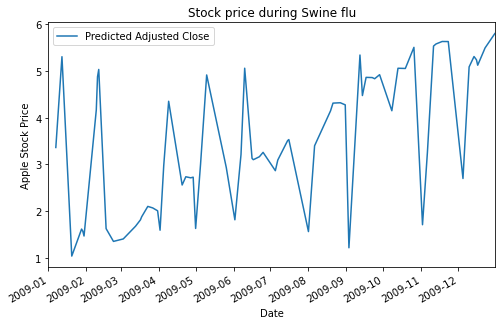

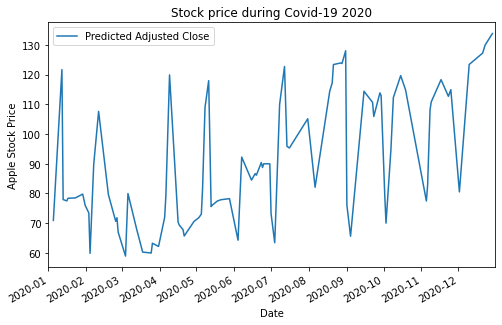

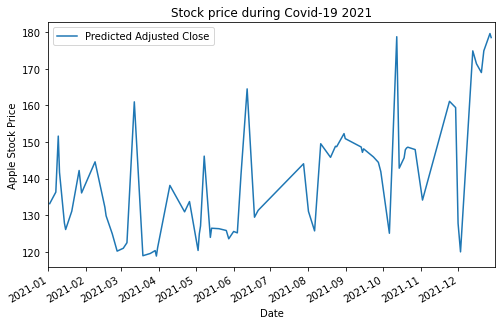

Mean squared error of Amazon 3.926121882685023e-25


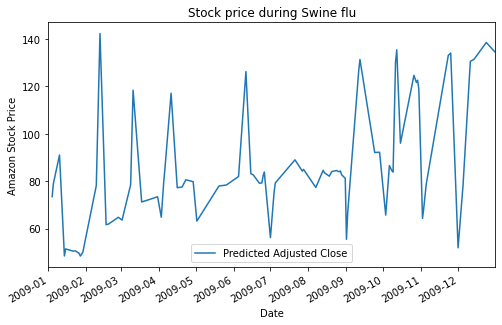

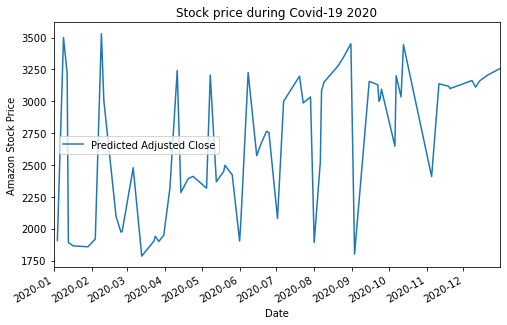

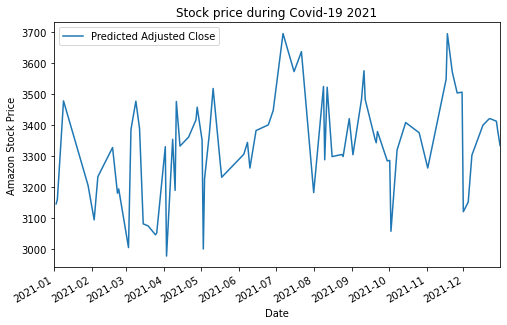

Mean squared error of Facebook 1.0590457652592083e-27


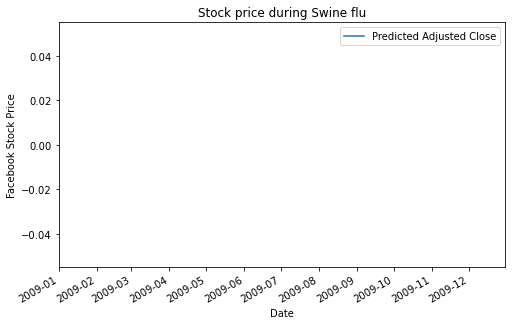

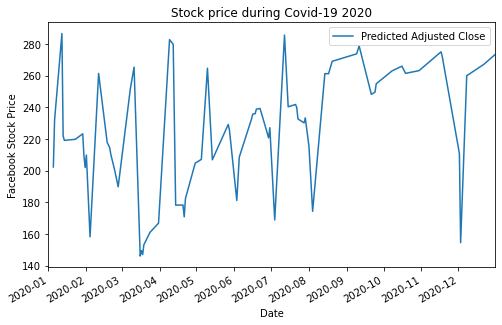

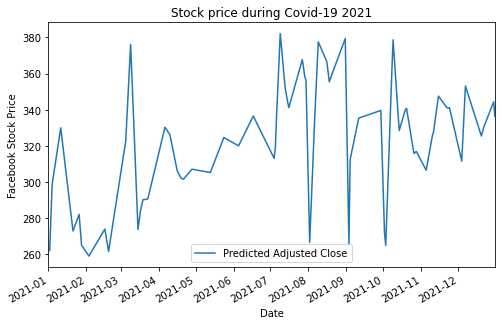

Mean squared error of Google 1.6803236962130893e-26


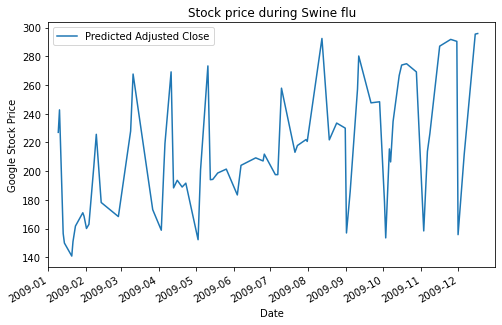

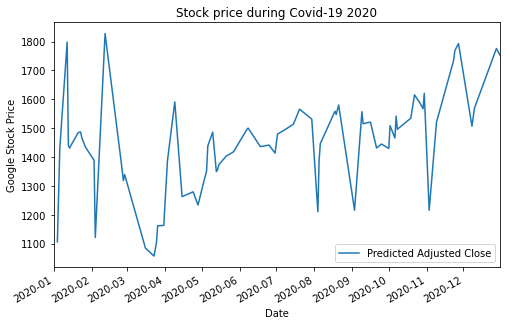

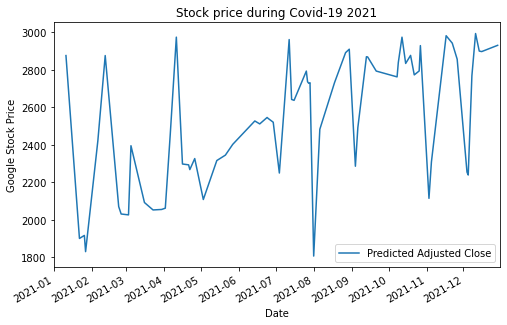

Mean squared error of Microsoft 0.8704374814738253


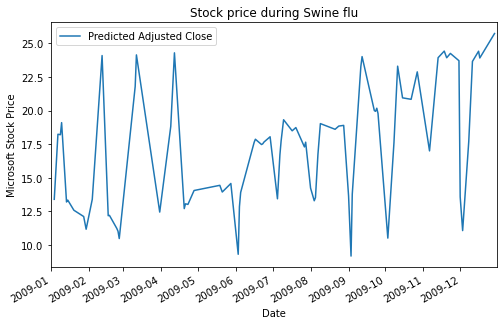

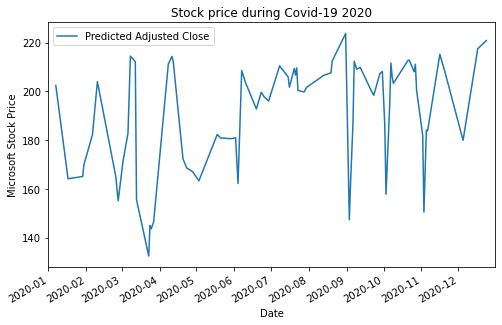

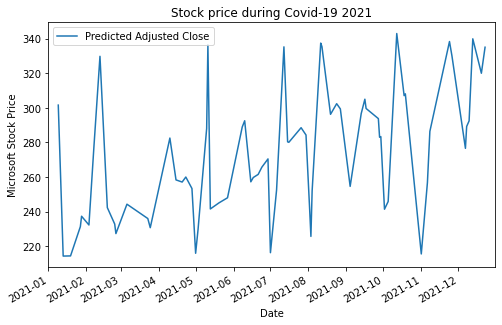

Mean squared error of Netflix 2.8457998762516636e-26


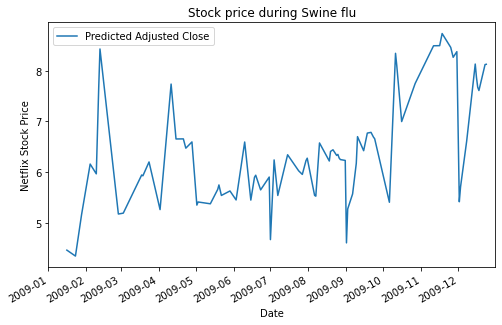

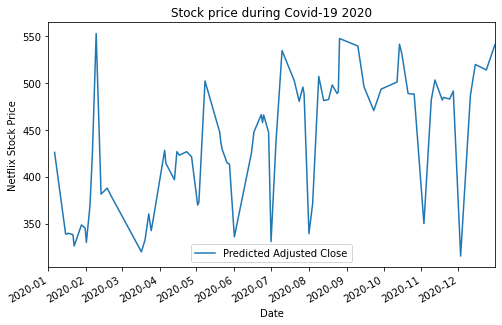

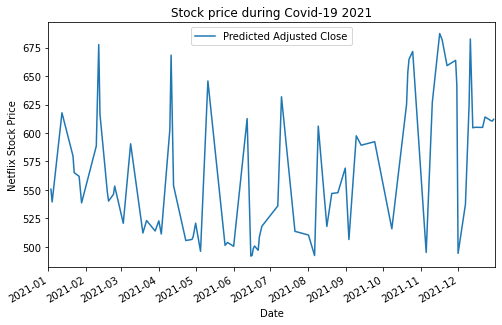

In [5]:
warnings.filterwarnings("ignore")

apple=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/AAPL.csv')
y_pred_apple=predictLinearRegression(apple,"Apple")


amazon=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/AMZN.csv')
y_pred_amazon=predictLinearRegression(amazon,"Amazon")


facebook=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/FB.csv')
y_pred_fb=predictLinearRegression(facebook,"Facebook")


google=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/GOOG.csv')
y_pred_google=predictLinearRegression(google,"Google")


microsoft=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/MSFT.csv')
y_pred_ms=predictLinearRegression(microsoft,"Microsoft")

netflix=pd.read_csv('C:/Users/nambu/Desktop/SML/Project/sp500/csv/NFLX.csv')
y_pred_netflix=predictLinearRegression(netflix,"Netflix")


#y_pred_apple